![convert notebook to web app](https://wallpapercave.com/wp/wp7469810.jpg)

# Problem Statement

Exploratory Data Analysis on dataset Indian Premier League
As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team.

Suggest teams or players a company should endorse for its products.

# Content

i)All Indian Premier League Cricket matches between 2008 and 2016.

ii)This is the ball by ball data of all the IPL cricket matches till season 9.

iii)The dataset contains 2 files: deliveries.csv and matches.csv.

vi)matches.csv contains details related to the match such as location, contesting teams, umpires, results, etc.

v)deliveries.csv is the ball-by-ball data of all the IPL matches including data of the batting team, batsman, bowler, non-striker, runs scored, etc.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from subprocess import check_output
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [3]:
matches=pd.read_csv("matches.csv")
delivery=pd.read_csv("deliveries.csv")

In [4]:
matches.shape

(636, 18)

In [5]:
delivery.shape

(150460, 21)

In [6]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets,umpire3
count,636.000000,636.000000,636.000000,636.000000,636.000000,0.0
mean,318.500000,2012.490566,0.025157,13.682390,3.372642,NaN
std,183.741666,2.773026,0.156726,23.908877,3.420338,NaN
min,1.000000,2008.000000,0.000000,0.000000,0.000000,NaN
25%,159.750000,2010.000000,0.000000,0.000000,0.000000,NaN
50%,318.500000,2012.000000,0.000000,0.000000,4.000000,NaN
75%,477.250000,2015.000000,0.000000,20.000000,7.000000,NaN
max,636.000000,2017.000000,1.000000,146.000000,10.000000,NaN


In [7]:
delivery.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000
mean,318.281317,1.482188,10.142649,3.616483,0.000538,0.037498,0.004885,0.022232,0.004340,0.000066,1.222445,0.069022,1.291466
std,182.955531,0.501768,5.674338,1.807698,0.023196,0.257398,0.114234,0.200104,0.072652,0.018229,1.594509,0.349667,1.583240
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,161.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,319.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,476.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,636.000000,4.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,6.000000,7.000000,7.000000


In [8]:
matches.head(3)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN


In [9]:
delivery.head(3)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


### checking null values

In [10]:
delivery.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    143022
dismissal_kind      143022
fielder             145091
dtype: int64

In [11]:
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

In [12]:
matches['winner'] = matches.winner.replace("no result",np.nan)

In [13]:
matches[matches.winner.isna()].replace("no result",np.nan,inplace=True)

In [14]:
matches[matches.winner.isna()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN


In [15]:
matches.drop(['umpire3'],axis=1,inplace=True) 
delivery.fillna(0,inplace=True)

In [16]:
matches.isnull().sum()

id                 0
season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             3
win_by_runs        0
win_by_wickets     0
player_of_match    3
venue              0
umpire1            1
umpire2            1
dtype: int64

In [17]:
matches['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
      dtype=object)

In [18]:
delivery.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)

In [19]:
matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)

### Number of matches per season

Text(0.5, 1.0, 'Number of matches per season')

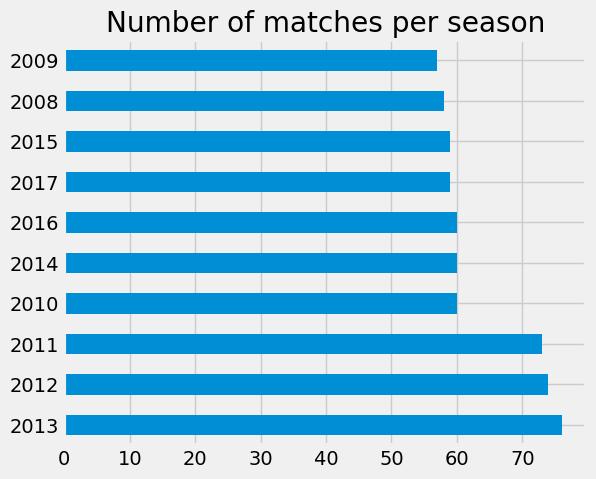

In [20]:
matches['season'].value_counts().plot(kind='barh',figsize=[6,5])
plt.title('Number of matches per season')

### number of venues and umpire

In [21]:
print('Total number of venues where the sport was played at:',matches['city'].nunique())
print('Total number of umpires ',matches['umpire1'].nunique())

Total number of venues where the sport was played at: 30
Total number of umpires  44


### who has won maximum number of man of the match awards
### who has won maximum number of successful winning matches

In [22]:
print((matches['player_of_match'].value_counts()).idxmax(),' : The player who has won maximum number of man of the match awards')
print(((matches['winner']).value_counts()).idxmax(),'       : The player who has won maximum number of successful winning matches')

CH Gayle  : The player who has won maximum number of man of the match awards
MI        : The player who has won maximum number of successful winning matches


### most win by runs

In [23]:
df=matches.iloc[[matches['win_by_runs'].idxmax()]]
df[['season','team1','team2','winner','win_by_runs']]

,season,team1,team2,winner,win_by_runs
43,2017,MI,DD,MI,146


<Axes: xlabel='win_by_runs', ylabel='Count'>

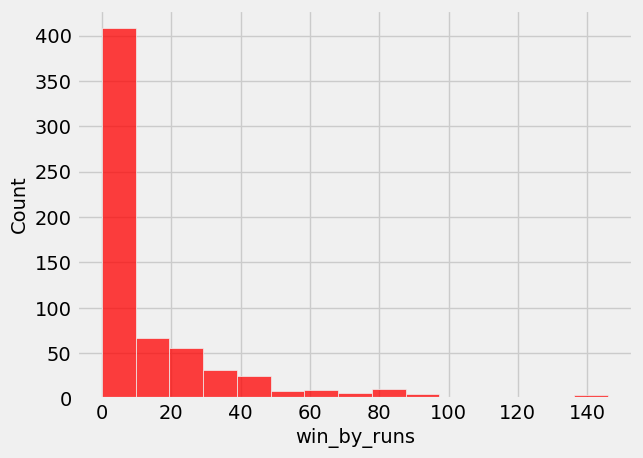

In [24]:
sns.histplot(data=matches['win_by_runs'],color='red',bins=15)

### most win by wickets

In [25]:
df=matches.iloc[[matches['win_by_wickets'].idxmax()]]
df[['season','team1','team2','winner','win_by_wickets']]

,season,team1,team2,winner,win_by_wickets
2,2017,GL,KKR,KKR,10


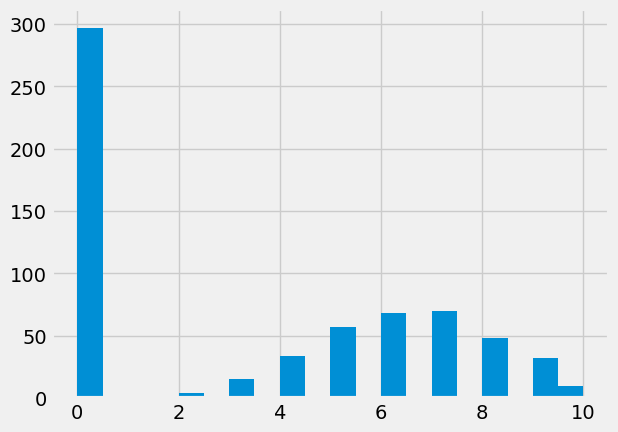

In [26]:
plt.hist(matches["win_by_wickets"],bins=20)
plt.show()

### winners (2008-2017)

In [27]:
print('Year wise winners :')
for i in range(2008,2017):
    df=((matches[matches['season']==i]).iloc[-1]) 
    print(df[[1,10]].values)

Year wise winners :
[2008 'RR']
[2009 'DC']
[2010 'CSK']
[2011 'CSK']
[2012 'KKR']
[2013 'MI']
[2014 'KKR']
[2015 'MI']
[2016 'SRH']


### Toss Decisions

In [28]:
print('Toss Decisions in %\n',((matches['toss_decision']).value_counts())/577*100)

Toss Decisions in %
 field    62.911612
bat      47.313692
Name: toss_decision, dtype: float64


Text(0.5, 1.0, 'favorite toss')

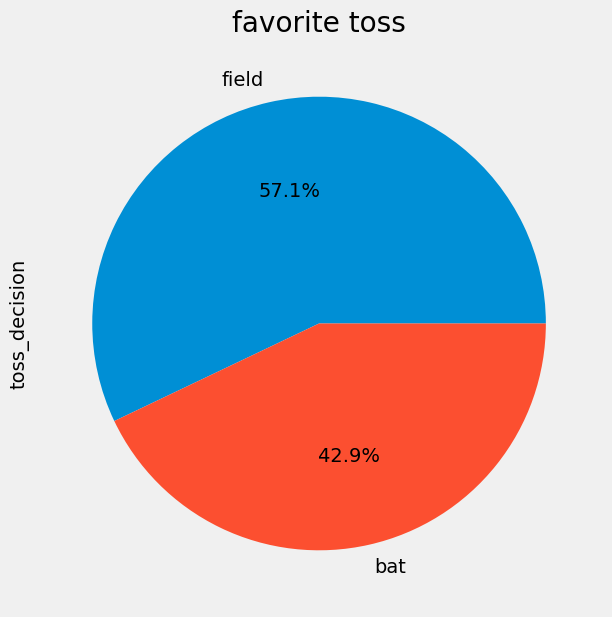

In [29]:
matches.toss_decision.value_counts().plot(kind='pie',figsize=[7,7],autopct='%1.1f%%')
plt.title('favorite toss')

### Number of Superover

In [30]:
print('Total number of matches with Super overs:',delivery[delivery['is_super_over']==1].match_id.nunique())

Total number of matches with Super overs: 7


### Most matches played in city

Text(0.5, 1.0, 'most matches played in city')

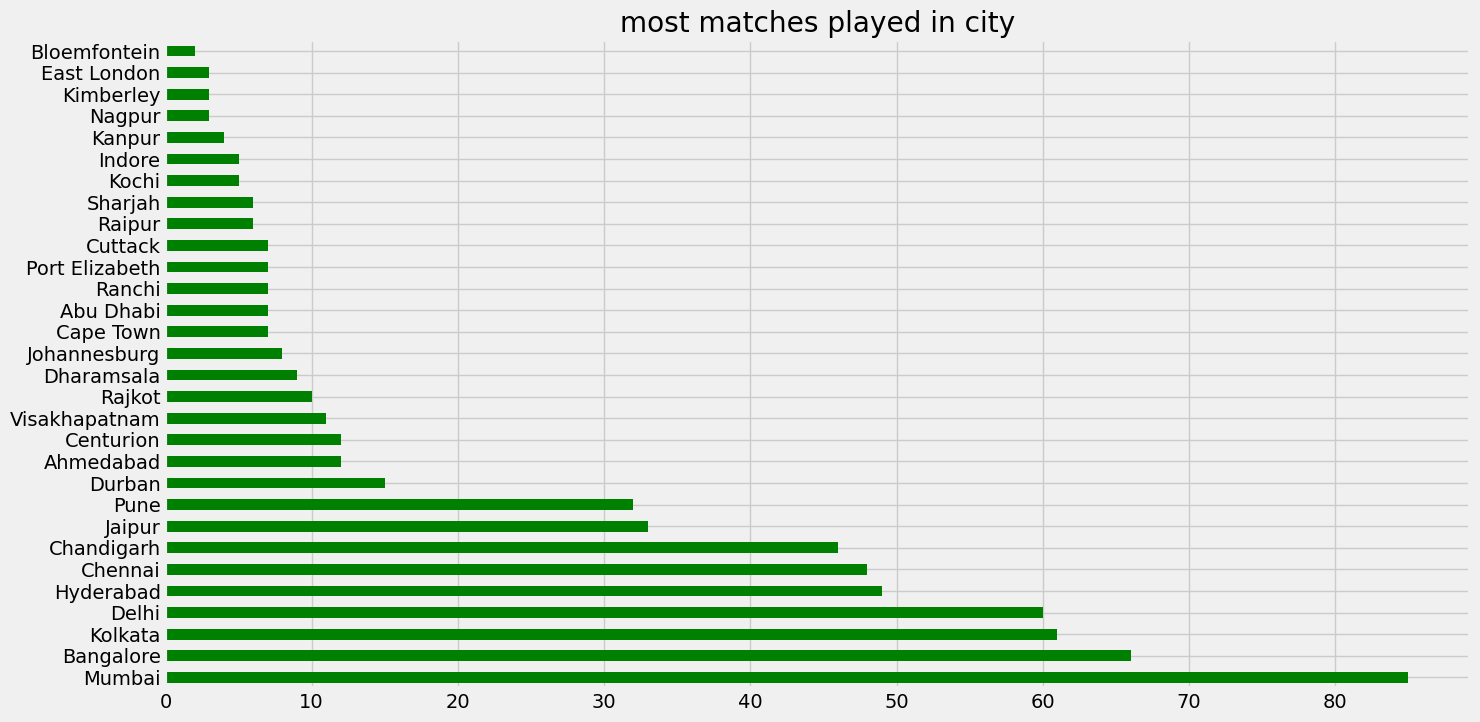

In [31]:
matches['city'].value_counts().plot(kind='barh',figsize=(15,8),color='green') # In which city most ipl matches played ?
plt.title('most matches played in city')

### Toss winners

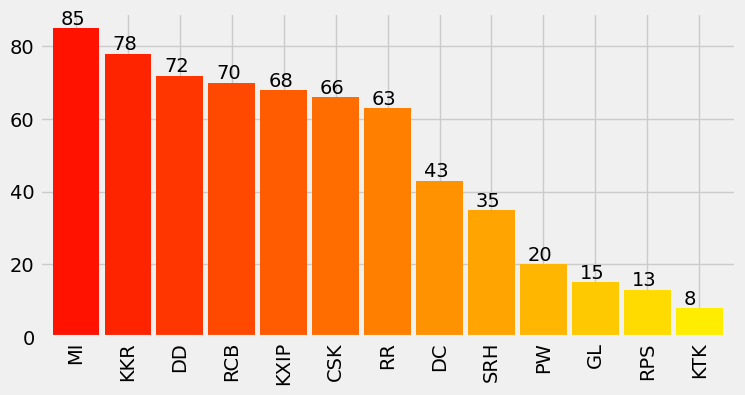

In [32]:
plt.subplots(figsize=(8,4))
ax=matches['toss_winner'].value_counts().plot.bar(width=0.9,color=sns.color_palette('autumn',13))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

### Toss decision

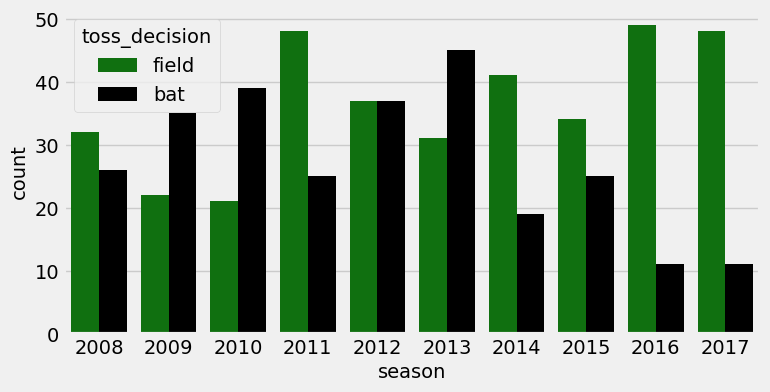

In [33]:
plt.subplots(figsize=(8,4))
colors = ["green","k"]
sns.countplot(x='season',hue='toss_decision',data=matches,palette = colors)
plt.show()

### No of umpires capped

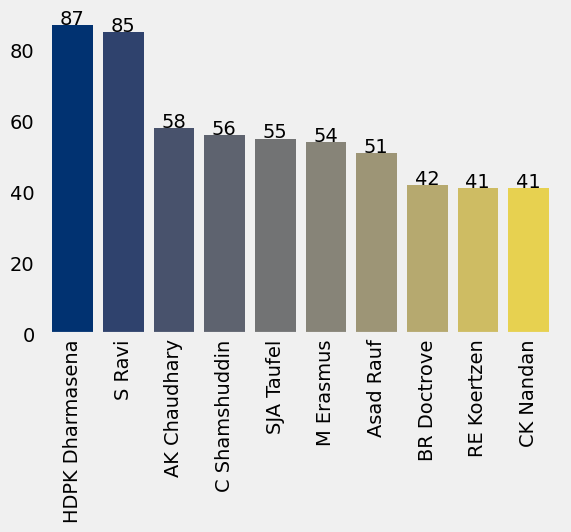

In [34]:
plt.subplots(figsize=(6,4))
ump=pd.concat([matches['umpire1'],matches['umpire2']]) 
ax=ump.value_counts().head(10).plot.bar(width=0.8,color=sns.color_palette('cividis',10),grid=False)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.25))
plt.show()

### No matches in each season

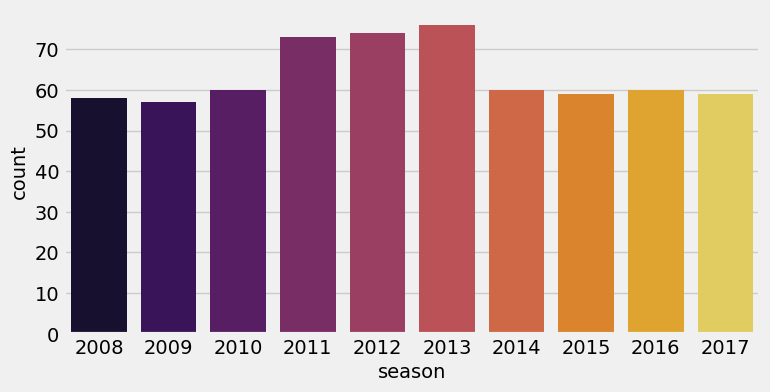

In [35]:
plt.subplots(figsize=(8,4))
sns.countplot(x='season',data=matches,palette=sns.color_palette('inferno',10))
plt.show()

### Top 10 Scores

In [36]:
high_scores=delivery.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
high_scores=high_scores[high_scores['total_runs']>=200]
bruh=high_scores.nlargest(10,'total_runs')
bruh

,match_id,inning,batting_team,bowling_team,total_runs
829,411,1,RCB,PW,263
1250,620,1,RCB,GL,248
416,206,1,CSK,RR,246
122,61,1,CSK,KXIP,240
1134,562,1,RCB,MI,235
596,296,1,KXIP,RCB,232
522,259,1,DD,KXIP,231
981,486,1,KXIP,CSK,231
100,50,1,KXIP,MI,230
1170,580,1,RCB,SRH,227


### Most player of the match

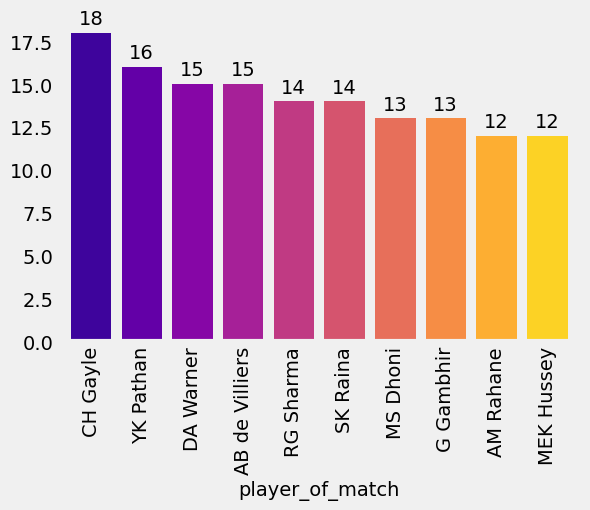

In [41]:
plt.subplots(figsize=(6,4))
ax = matches['player_of_match'].value_counts().head(10).plot.bar(width=.8, color=sns.color_palette('plasma',10),grid=False)
ax.set_xlabel('player_of_match') 
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.5))
plt.show()

### Total runs across the seasons

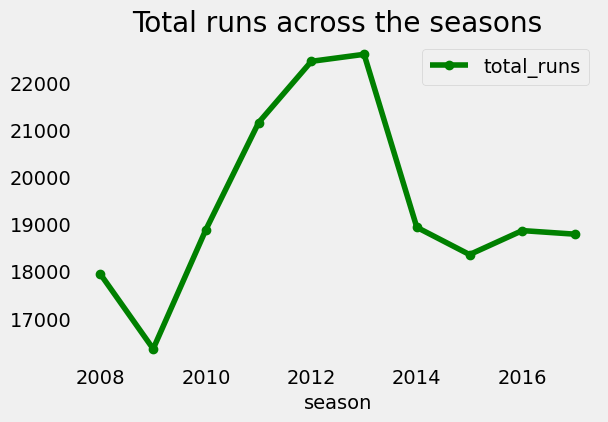

In [38]:
batsmen = matches[['id','season']].merge(delivery, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
season=batsmen.groupby(['season'])['total_runs'].sum().reset_index()
season.set_index('season').plot(marker='o',color = 'green',grid=False)
plt.gcf().set_size_inches(6,4)
plt.title('Total runs across the seasons')
plt.show()

### most run across the season

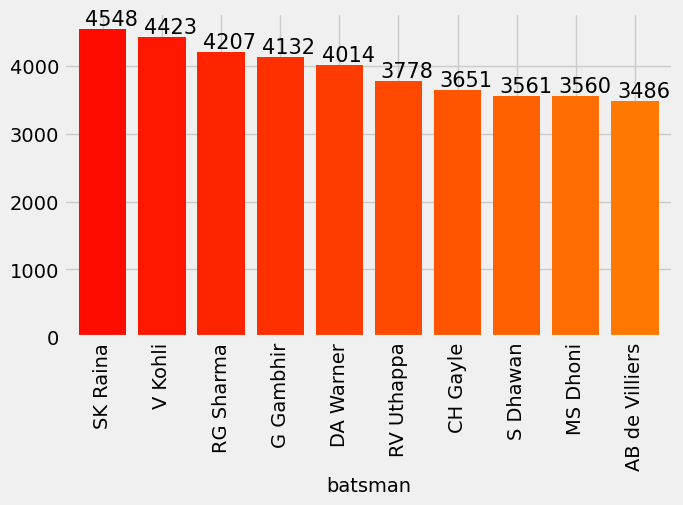

In [56]:
plt.subplots(figsize=(7,4))
max_runs=delivery.groupby(['batsman'])['batsman_runs'].sum()
ax=max_runs.sort_values(ascending=False)[:10].plot.bar(width=0.8,color=sns.color_palette('autumn',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+50),fontsize=15)
plt.show()

### Most wickect across the seasons

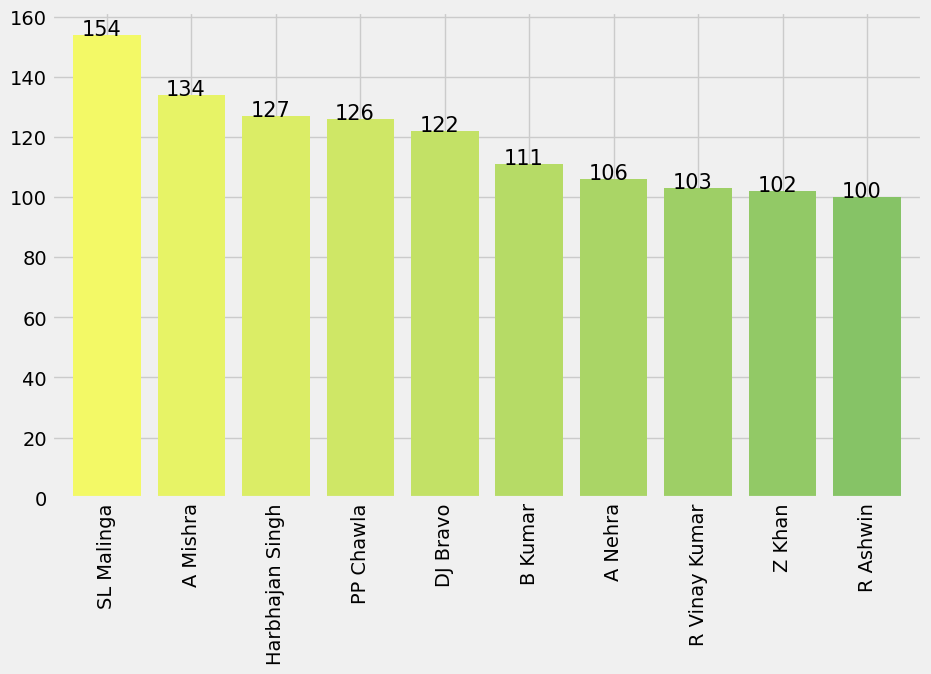

In [55]:
plt.subplots(figsize=(10,6))
dismissal_kinds = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]  #since run-out is not creditted to the bowler
ct=delivery[delivery["dismissal_kind"].isin(dismissal_kinds)]
ax=ct['bowler'].value_counts()[:10].plot.bar(width=0.8,color=sns.color_palette('summer_r',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.10, p.get_height()),fontsize=15)
plt.show()

### Most run in a innings

In [40]:
top_scores = delivery.groupby(["match_id", "batsman","batting_team"])["batsman_runs"].sum().reset_index()
top_scores.sort_values('batsman_runs', ascending=0).head(10)
top_scores.nlargest(10,'batsman_runs')

,match_id,batsman,batting_team,batsman_runs
6200,411,CH Gayle,RCB,175
900,60,BB McCullum,KKR,158
8426,562,AB de Villiers,RCB,133
9257,620,AB de Villiers,RCB,129
5585,372,CH Gayle,RCB,128
3135,206,M Vijay,CSK,127
529,36,DA Warner,SRH,126
7752,516,V Sehwag,KXIP,122
3686,243,PC Valthaty,KXIP,120
4223,279,V Sehwag,DD,119


### Highest strike rates in IPL

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 [Text(0, 0.0, '0'),
  Text(0, 20.0, '20'),
  Text(0, 40.0, '40'),
  Text(0, 60.0, '60'),
  Text(0, 80.0, '80'),
  Text(0, 100.0, '100'),
  Text(0, 120.0, '120'),
  Text(0, 140.0, '140'),
  Text(0, 160.0, '160')])

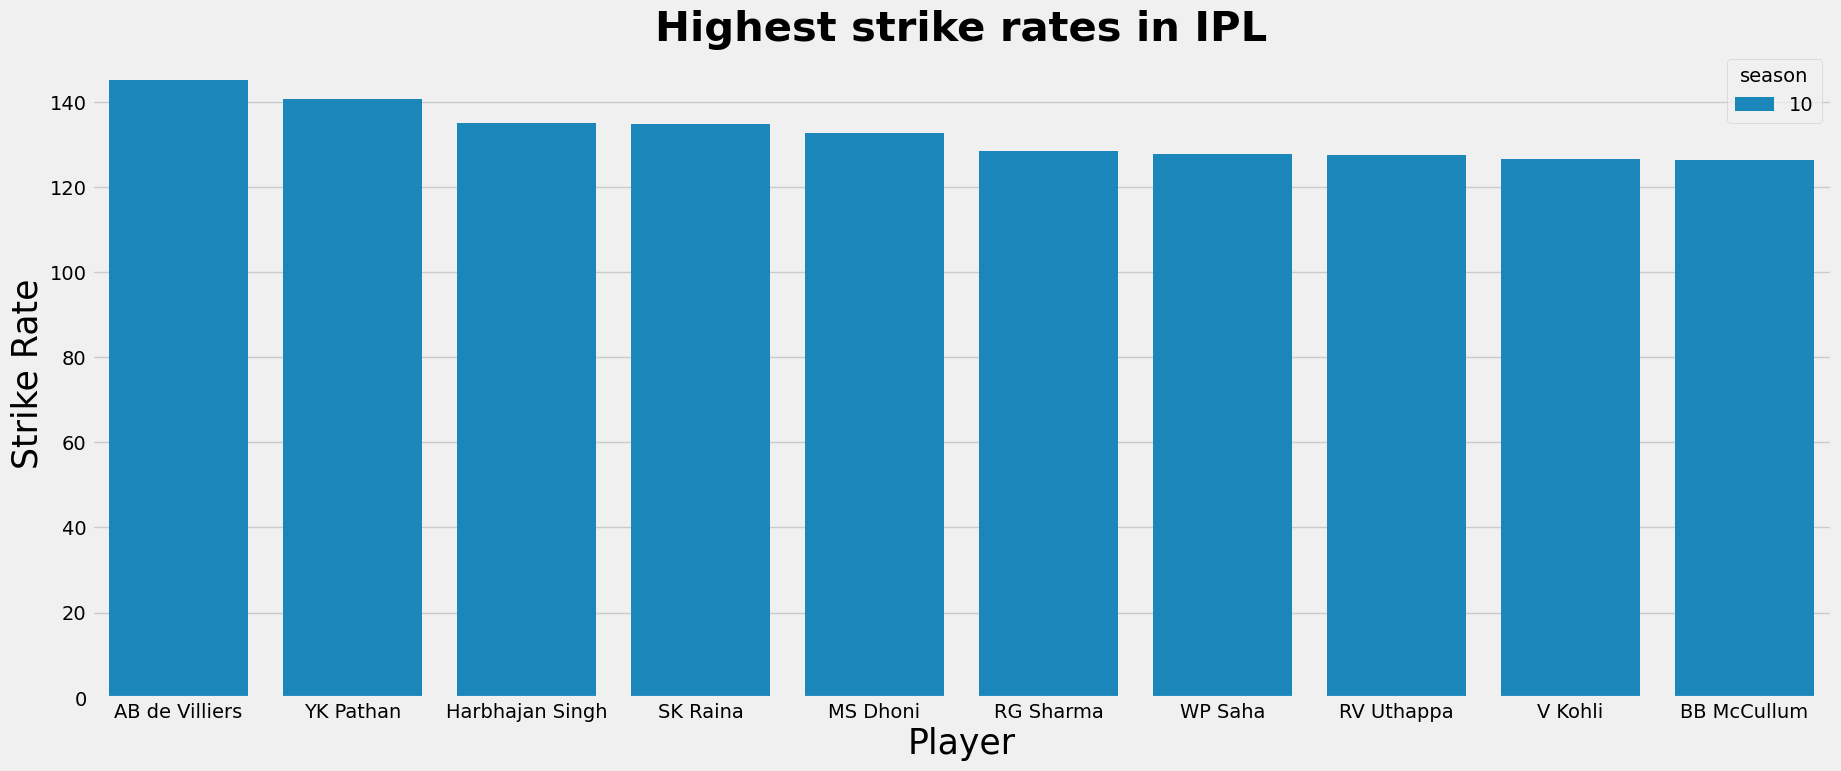

In [41]:
merge = pd.merge(delivery,matches, left_on='match_id', right_on ='id')
no_of_balls = pd.DataFrame(merge.groupby('batsman')['ball'].count()) 
runs = pd.DataFrame(merge.groupby('batsman')['batsman_runs'].sum())
seasons = pd.DataFrame(merge.groupby('batsman')['season'].nunique()) 
batsman_strike_rate = pd.DataFrame({'balls':no_of_balls['ball'],'run':runs['batsman_runs'],'season':seasons['season']})
batsman_strike_rate.reset_index(inplace = True)
batsman_strike_rate['strike_rate'] = batsman_strike_rate['run']/batsman_strike_rate['balls']*100
highest_strike_rate = batsman_strike_rate[batsman_strike_rate.season.isin([10,11])][['season','batsman','strike_rate']].sort_values(by = 'strike_rate',ascending = False)
plt.figure(figsize = (20,8))
sns.barplot(x='batsman', y='strike_rate', data = highest_strike_rate.head(10), hue = 'season')
plt.title("Highest strike rates in IPL",fontsize= 30, fontweight = 'bold')
plt.xlabel("Player", size = 25)
plt.ylabel("Strike Rate", size = 25)
plt.xticks(size = 14)
plt.yticks(size = 14)

### Win by wickets vs Win by runs

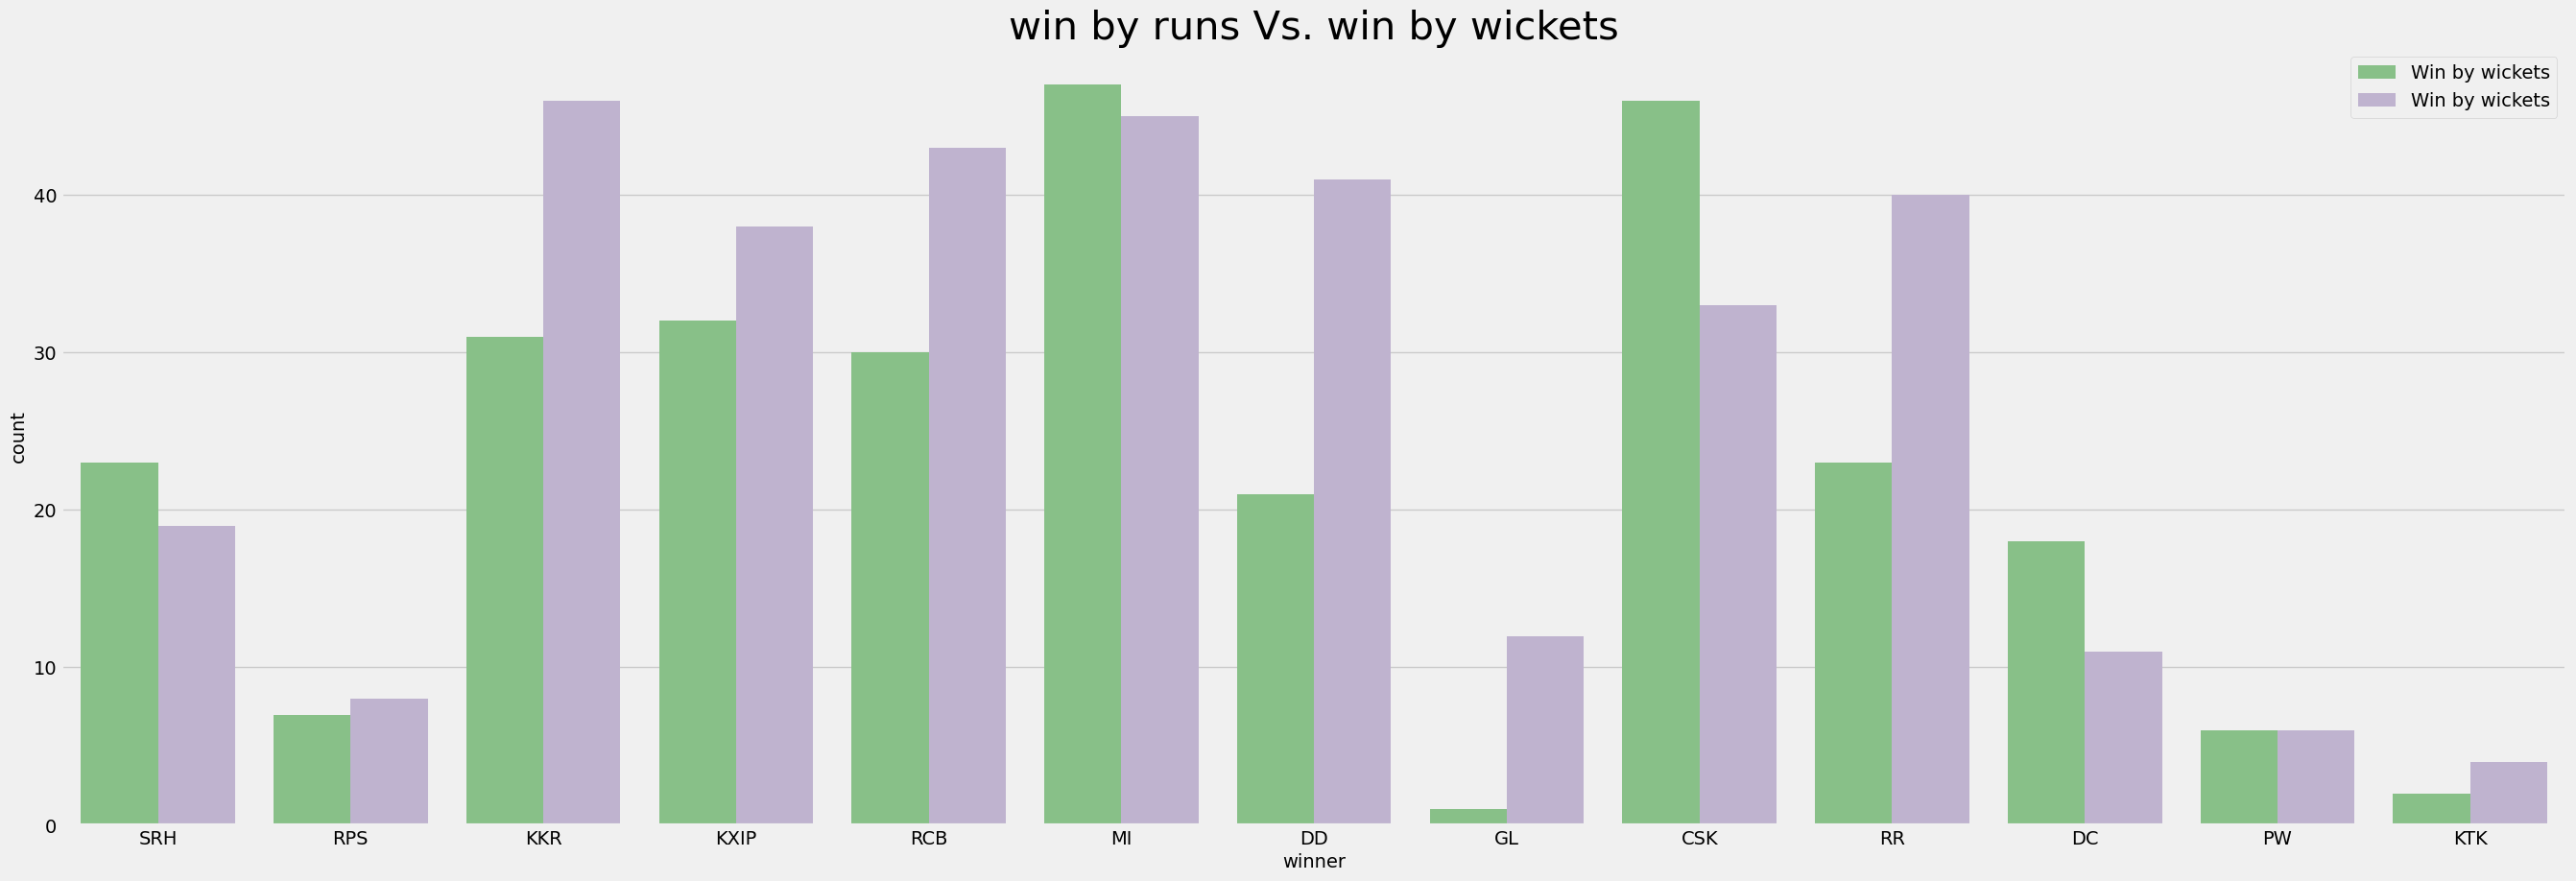

In [42]:
plt.subplots(figsize = (30,10))
matches['run'] = matches['win_by_runs'].apply(lambda x: '0' if x <= 0 else '1')
ax = sns.countplot(x="winner", hue ='run', data = matches,palette = "Accent")
legend_labels, _= ax.get_legend_handles_labels()
plt.title('win by runs Vs. win by wickets', fontsize = 30)
ax.legend(legend_labels, ['Win by wickets','Win by wickets'], bbox_to_anchor=(1,1))
plt.show()

### most over bowled

In [43]:
eco=delivery.groupby(['bowler']).sum()
eco['total balls']=delivery['bowler'].value_counts()
eco['overs']=(eco['total balls']//6)
eco[eco['overs']>200].sort_values(by='overs',ascending=0)['overs'].head(6).reset_index()

,bowler,overs
0,Harbhajan Singh,498
1,A Mishra,450
2,SL Malinga,449
3,P Kumar,439
4,PP Chawla,432
5,R Ashwin,393


### Sixes and Fours Across the Season

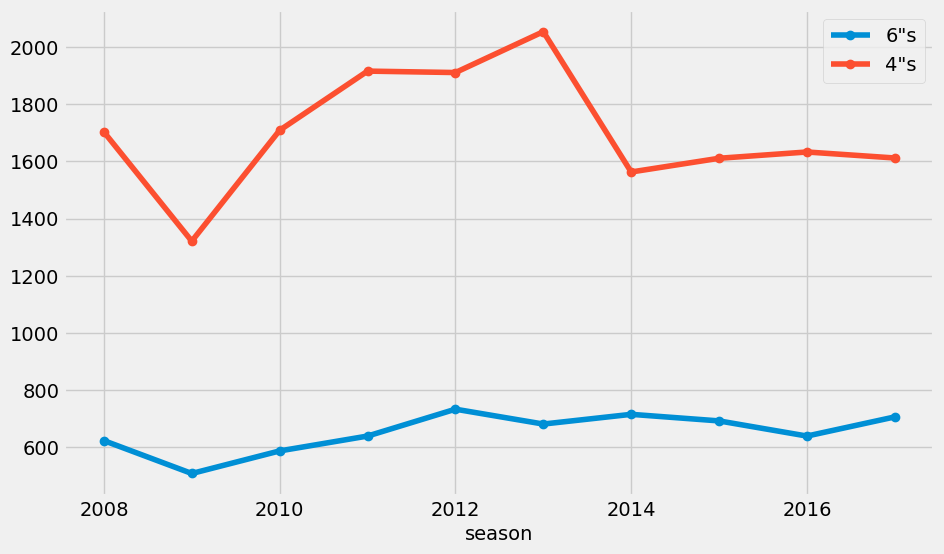

In [45]:
Season_boundaries=batsmen.groupby("season")["batsman_runs"].agg(lambda x: (x==6).sum()).reset_index()
a=batsmen.groupby("season")["batsman_runs"].agg(lambda x: (x==4).sum()).reset_index()
Season_boundaries=Season_boundaries.merge(a,left_on='season',right_on='season',how='left')
Season_boundaries=Season_boundaries.rename(columns={'batsman_runs_x':'6"s','batsman_runs_y':'4"s'})
Season_boundaries.set_index('season')[['6"s','4"s']].plot(marker='o')
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

### Runs Scored By Batsman Across Seasons

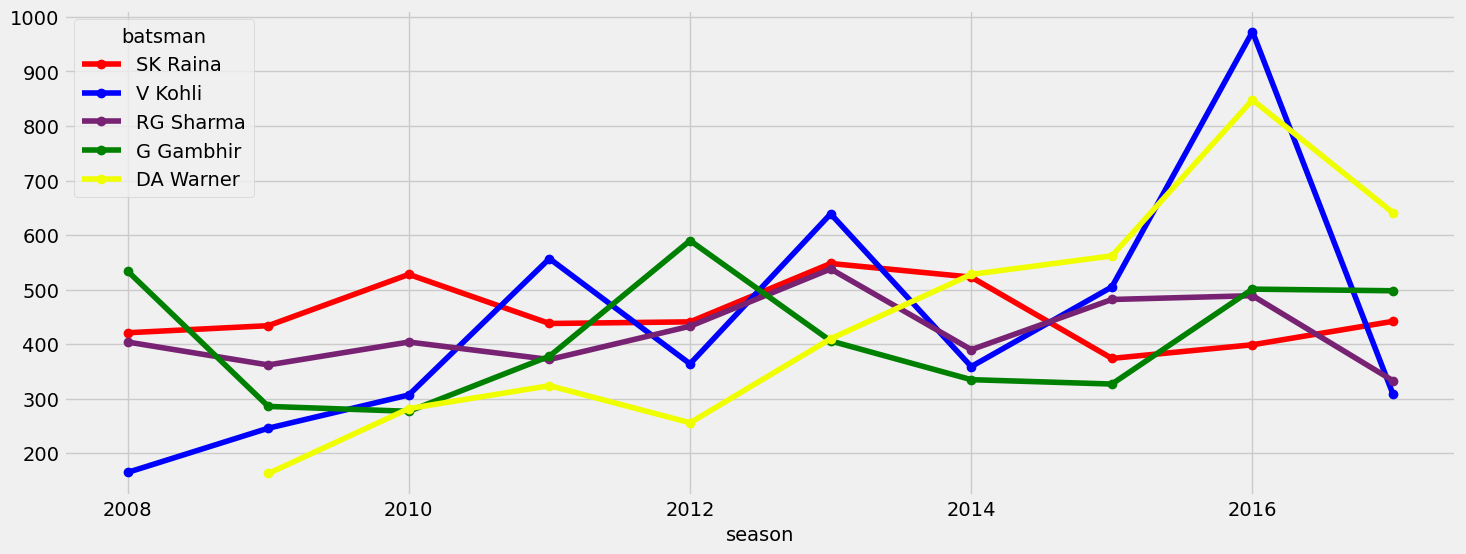

In [53]:
a=batsmen.groupby(['season','batsman'])['batsman_runs'].sum().reset_index()
a=a.groupby(['season','batsman'])['batsman_runs'].sum().unstack().T
a['Total']=a.sum(axis=1)
a=a.sort_values(by='Total',ascending=0)[:5]
a.drop('Total',axis=1,inplace=True)
a.T.plot(color=['red','blue','#772272','green','#f0ff00'],marker='o')
fig=plt.gcf()
fig.set_size_inches(16,6)
plt.show()

### Top Batsman's with 1's, 2's, 4's, 6's

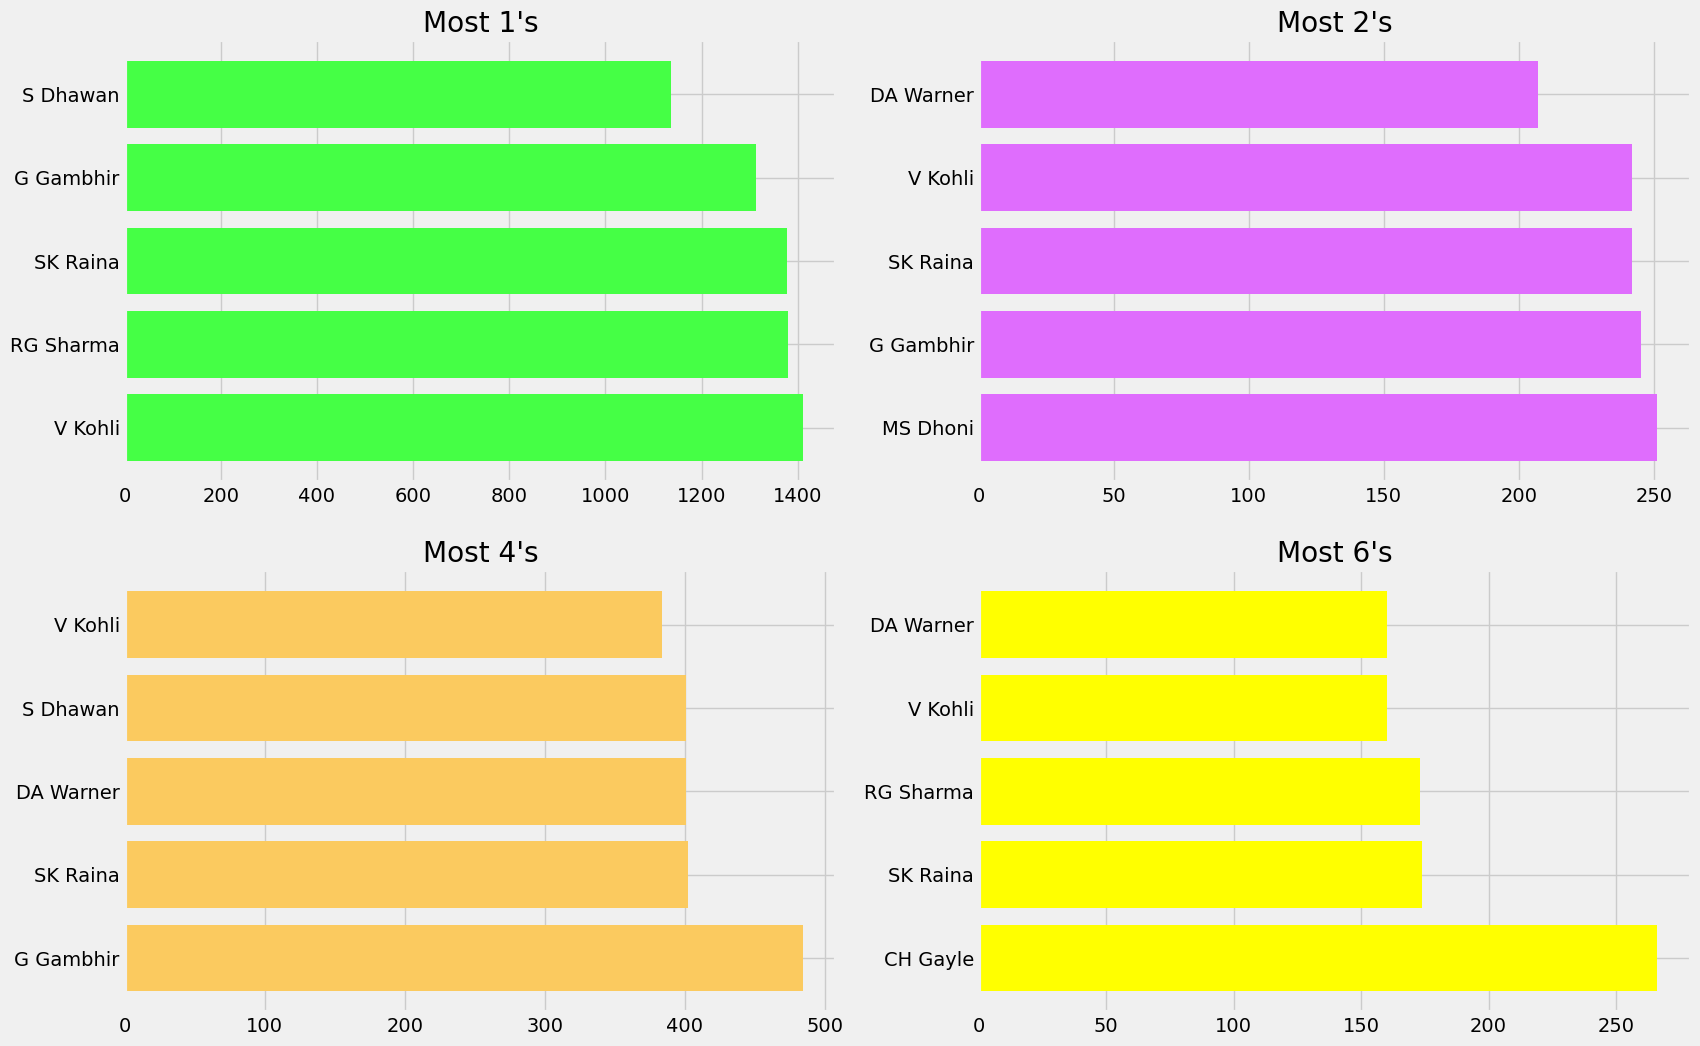

In [51]:
toppers=delivery.groupby(['batsman','batsman_runs'])['total_runs'].count().reset_index()
toppers=toppers.pivot('batsman','batsman_runs','total_runs')
fig,ax=plt.subplots(2,2,figsize=(18,12))
toppers[1].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[0,0],color='#45ff45',width=0.8)
ax[0,0].set_title("Most 1's")
ax[0,0].set_ylabel('')
toppers[2].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[0,1],color='#df6dfd',width=0.8)
ax[0,1].set_title("Most 2's")
ax[0,1].set_ylabel('')
toppers[4].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[1,0],color='#fbca5f',width=0.8)
ax[1,0].set_title("Most 4's")
ax[1,0].set_ylabel('')
toppers[6].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[1,1],color='#ffff00',width=0.8)
ax[1,1].set_title("Most 6's")
ax[1,1].set_ylabel('')
plt.show()

### Score Distribution For Teams by Innings

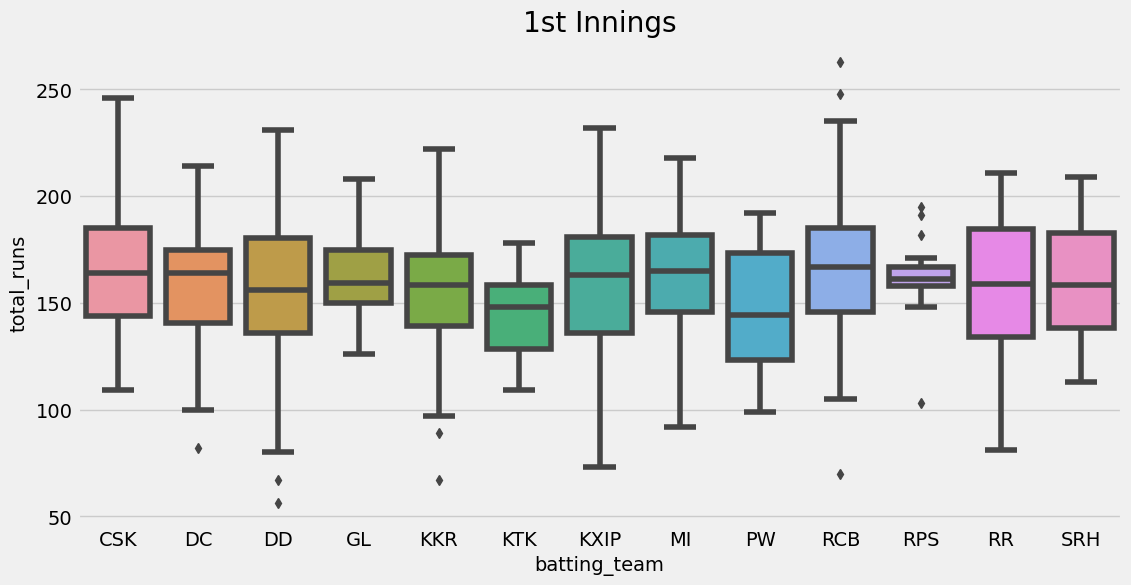

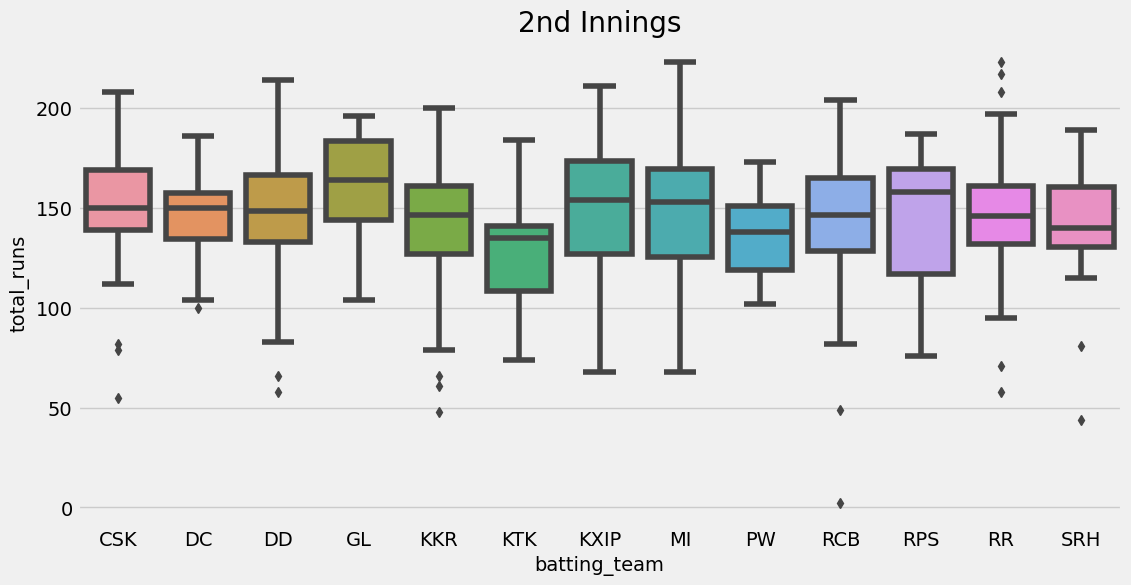

In [46]:
plt.subplots(figsize=(12,6))
xyz=delivery.groupby(['match_id','inning','batting_team'])['total_runs'].sum().reset_index()
xyz.drop('match_id',axis=1,inplace=True)
xyz=xyz.sort_values(by=['batting_team','total_runs'],ascending=True)
score_1_inning=xyz[xyz['inning']==1]
score_2_inning=xyz[xyz['inning']==2]
sns.boxplot(x='batting_team',y='total_runs',data=score_1_inning).set_title('1st Innings')
plt.show()
sns.boxplot(x='batting_team',y='total_runs',data=score_2_inning).set_title('2nd Innings')
fig=plt.gcf()
fig.set_size_inches(12,6)

According to Graph 1 the batting by CSK in innings 1 looks to be the best. Graph 2 also conveys the same story.

In Graph 2 we see a point near 0 which may seem to be outlier. But it is so because the match was disrupted.

### Removing outliers

#### matches that are delayed/postponded

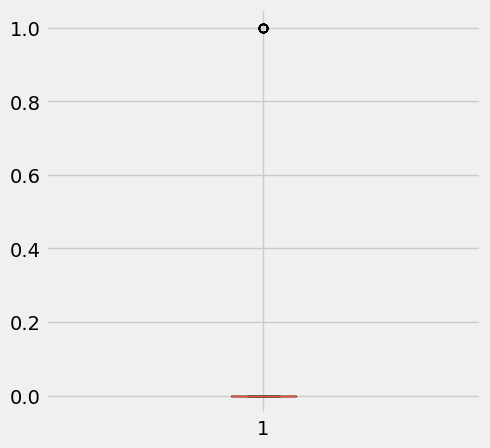

In [47]:
data = matches['dl_applied']
 
fig = plt.figure(figsize =(5, 5))
 
# Creating plot
plt.boxplot(data)
 
# show plot
plt.show()

In [48]:
def rem_outliers(col):
    sorted(col)
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR =Q3-Q1
    lower_range = Q1 - (1.5*IQR)
    upper_range = Q3 + (1.5*IQR)
    return lower_range,upper_range
lowNo_of_Votes,upNo_of_Votes = rem_outliers(matches["dl_applied"])
matches["dl_applied"] = np.where(matches["dl_applied"]>upNo_of_Votes,upNo_of_Votes,matches["dl_applied"])
matches["dl_applied"] = np.where(matches["dl_applied"]<lowNo_of_Votes,lowNo_of_Votes,matches["dl_applied"])

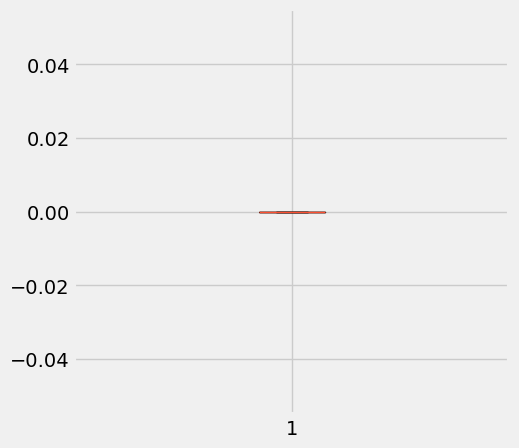

In [49]:
data = matches['dl_applied']
 
fig = plt.figure(figsize =(5, 5))
 
# Creating plot
plt.boxplot(data)
 
# show plot
plt.show()